In [60]:
import numpy as np
import matplotlib.pyplot as plt

## Linear Regressión

In [61]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100,1) #Linear model

In [62]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) #Normal equation

In [63]:
theta_best

array([[4.49217348],
       [3.03950618]])

In [64]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.49217348],
       [10.57118585]])

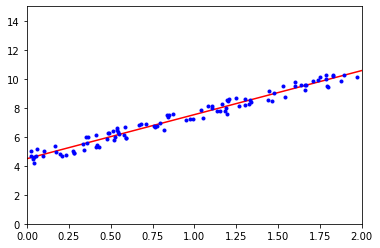

In [65]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Linear regressión with Scikit-Learn

In [66]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

(array([4.49217348]), array([[3.03950618]]))

In [67]:
lin_reg.predict(X_new)

array([[ 4.49217348],
       [10.57118585]])

In [68]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.49217348],
       [3.03950618]])

In [69]:
np.linalg.pinv(X_b).dot(y)

array([[4.49217348],
       [3.03950618]])

## Gradient Descent

Gradient descent is a method to find the minimum value of the cost function adjusting the parameters until a global minimum  is found. This can be donde by computing the gradient since this one indicates the greatest increase in something across space, so the only thing left after compute the gradient is to points it to go downhill.


1. Batch Gradient Descent
2. Stochastic Gradient Descent

### Batch Gradient Descent

One way to compute the gradient descent is using the batch gradient descent, which computes all partial derivates in one go. It uses the whole training set to compute the gradients at every step.

In [70]:
eta = 0.1 #learning rate
n_iterations = 1000
m = 100

theta = np.random.rand(2,1) #random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    

The learning rate is important because it defines the size of the steps in the iterations. If you put a high learning rate, it could happen that the algorithm gets furter from the solution; if you put a low learning rate, it will take a log time to find the solution.

In [71]:
theta

array([[4.49217348],
       [3.03950618]])

### Stochastic Gradient Descent

Other way to compute the gradient descent is using the stochastic gradient descent unlike the batch gradient descent that has to use the whole training set at every step, this one picks a random instance in the training set at every step and computes the gradients based only on that single instance. Because is very regular, once the algorithm stops the final parameters are good, but not are the optimal. This is useful when there are local minimums since with Batch Gradient Descent you can get stuck in there.

To make the algorithm settle at the minimum the learning rate gets smaller at every iteration. 

In [72]:
n_epochs = 50
t0, t1 = 5, 50 #learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) #random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [73]:
theta

array([[4.50011639],
       [3.02471891]])

In [74]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [75]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.47841549]), array([3.04111638]))

### Mini-batch Gradient Descent

This algorithm computes the gradients based on small random sets of instances. The progress in this one is less erratic than with SGD, but it's harder to escape from a local minimum.

## Polynomial Regression

This technique uses a linear model to fit non linear data.

In [76]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

The polynomial features class transform the data by raising the polynomials to the indicated degree.

In [77]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [78]:
X[0]

array([-1.74701439])

In [79]:
X_poly[0]

array([-1.74701439,  3.05205927])

In [80]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.02925786]), array([[0.97100135, 0.49088555]]))

## Learning Curves

These are plots of the model's performance on the training set and the validation set as a function of the training set size.

In [81]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

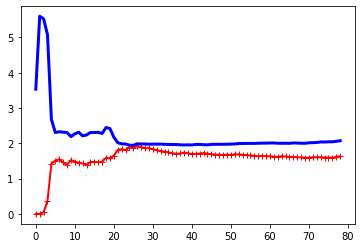

In [82]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

This model is underfitting the training data, it performs bad in the training data and it cannot generalize at the validation data that's the reason because the blue line starts with a 5 RMSE. One way to solve that is to use a more complex model or come up with better features.

In [83]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression())
    ])

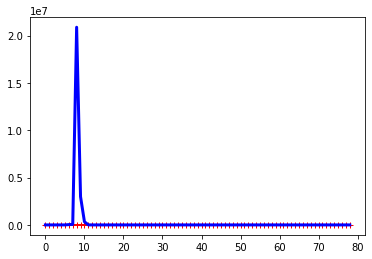

In [84]:
plot_learning_curves(polynomial_regression, X, y)

The error on the training data is much lower than in the previous example, but it's a greater gap between the error of the training data and the error of the validation data, this means the model is overfitting. One way to solve this is to feed the model with more training data until the validation error reaches the trainin error.

## Regularized Linear Models

A way to reduce the overfittiing that results from simple linear regression is to regulatize the model. This can be done by contraint the weigths ot the parameters.

### Ridge Regression

Ridge regression consists on adding a regularization term to the cost function. This term is an hyperparameter that controls how much you want to regularize the model multiplied by half the square of the l2 norm of the weight of the vector. This shrinks the coefficients and reduce the model complexity, if the coefficients take large values the optimization function is penalized.

Ridge regression using a closed-form solution

In [85]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.76300211]])

Ridge regression using Stochastic Gradient Descent

In [86]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.74537617])

### Lasso Regression

Least Absolute Shrinkage and Selection Operator Regression. It adds a regulatization term to cost function, using the l1 norm instead of half the square of the l2 norm. It tends to reduce the useless features't weights down to zero, so it can help us in feature selection.

In [87]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.71350233])

Stochastic Gradient Descent can be used too, asigning penalty to "l1"

### Elastic Net

It's a middle gorund between Ridge regression and Lasso, you can control it with the mix ratio r. If ratio =0, is equivalent to Ridge regressión. If ratio =1, is equivalent to Lasso regression.

In [88]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.71773413])

In [89]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)



### Early Stopping

This regularization method consists in stop to training the model as soon as the validation error reaches a minimum.

In [90]:
from copy import deepcopy
from sklearn.preprocessing import StandardScaler

#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)


poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)




# Logistic Regression

The next model predicts if the species of a an Iris flower is type Iris virginica or not. 

In [91]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [92]:
X = iris["data"][:, 3:] #petal width
y = (iris["target"] == 2).astype(int) #1 if Iris virginica, else 0

In [93]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

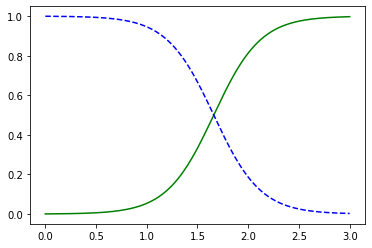

In [94]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica") #green
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica") #blue


### Softmax Regression

In [95]:
X = iris["data"][:, (2,3)] #petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X,y)


LogisticRegression(C=10, multi_class='multinomial')

In [96]:
softmax_reg.predict([[5,2]])

array([2])

In [97]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

## Exercises

### Exercise 12

Implement  Batch  Gradient  Descent  with  early  stopping  for  Softmax  Regression(without using Scikit-Learn).

In [130]:
X = iris["data"][:,(2,3)]
y = iris["target"]

In [131]:
np.random.seed(2042)

In [132]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [133]:
X_with_bias = np.c_[np.ones([len(X), 1]), X]

Splitting the data

In [134]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

random_indices = np.random.permutation(total_size)

X_train = X_with_bias[random_indices[:train_size]]
y_train = y[random_indices[:train_size]]
X_valid = X_with_bias[random_indices[train_size:-test_size]]
y_valid = y[random_indices[train_size:-test_size]]
X_test = X_with_bias[random_indices[-test_size:]]
y_test = y[random_indices[-test_size:]]

In [135]:
def one_hot_encoder(y):
    m = len(y)
    n_classes = y.max()+1
    one_hot_y = np.zeros((m, n_classes))
    row_number = np.arange(m)
    one_hot_y[row_number, y] = 1
    
    return one_hot_y

In [136]:
y_train_one_hot = one_hot_encoder(y_train)
y_valid_one_hot = one_hot_encoder(y_valid)
y_test_one_hot = one_hot_encoder(y_test)

In [137]:
y_test

array([1, 2, 2, 1, 1, 1, 0, 0, 0, 2, 0, 1, 2, 0, 1, 1, 2, 2, 2, 0, 2, 1,
       0, 2, 0, 0, 1, 0, 2, 1])

In [138]:
y_test_one_hot

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [148]:
def softmax_function(scores):
    exps = np.exp(scores)
    sumExps = np.sum(exps, axis=1, keepdims=True)
    est_proba = exps/sumExps
    return est_proba

In [149]:
n_inputs = X_train.shape[1]
n_outputs = len(np.unique(y_train))
print(n_inputs, n_outputs)

3 3


In [165]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    scores = X_train.dot(Theta)
    Y_proba = softmax_function(scores)
    error = Y_proba - y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients
    
    scores = X_valid.dot(Theta)
    Y_proba = softmax_function(scores)
    xentropy_loss = -np.mean(np.sum(y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, los, "early stopping!")
        break
    

0 2.364576413191911
500 1.0832958241137987
1000 0.858301144382236
1500 0.7444776367070812
2000 0.6819596350503034
2500 0.6444443646065374
3000 0.6200796988615982
3500 0.6031960116881814
4000 0.5908793222461306
4500 0.5815237939870627
5000 0.5741876895692585


In [166]:
Theta

array([[ 3.50478779,  0.2553985 , -1.57078545],
       [-0.7397349 ,  0.26534052,  0.48003493],
       [-0.42312042, -0.09032854,  0.50522602]])

In [167]:
scores = X_valid.dot(Theta)
Y_proba = softmax_function(scores)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9

## Consulted Sources

https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

Hands-On Machine Learning